In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [11]:
data = pd.read_csv('internet_service_churn.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15   

In [12]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Summary:")
print("Numerical variables plotted: ", list(numeric_columns))
print("Categorical variables plotted: ", list(categorical_columns))

Summary:
Numerical variables plotted:  ['id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn']
Categorical variables plotted:  []


Кількість пропущених значень у кожному стовпці:
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Відсоток пропущених значень у кожному стовпці:
id                              0.000000
is_tv_subscriber                0.000000
is_movie_package_subscriber     0.000000
subscription_age                0.000000
bill_avg                        0.000000
reamining_contract             29.847525
service_failure_count           0.000000
download_avg                    0.527161
upload_avg                      0.527161
download_over_limit             0.000000
churn                           0.000000
dtype: float64


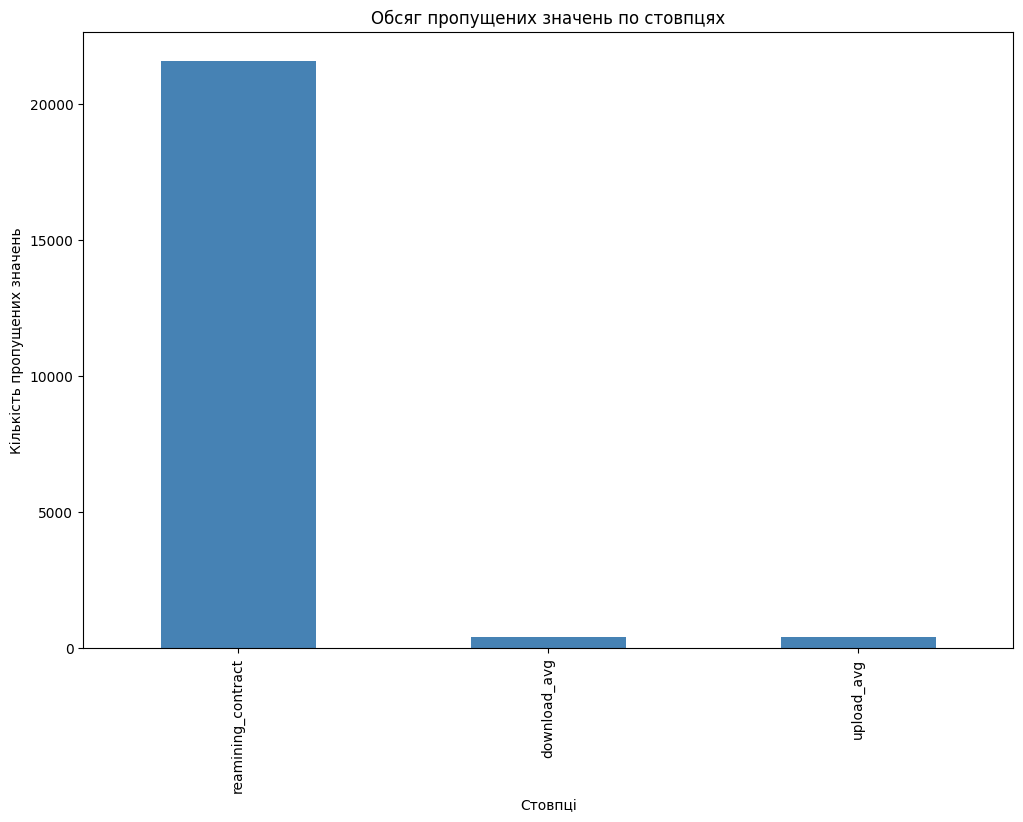

In [13]:
missing_data = data.isnull().sum()
missing_data_percent = (missing_data / len(data)) * 100

print("Кількість пропущених значень у кожному стовпці:")
print(missing_data)

print("\nВідсоток пропущених значень у кожному стовпці:")
print(missing_data_percent)

plt.figure(figsize=(12, 8))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title("Обсяг пропущених значень по стовпцях")
plt.xlabel("Стовпці")
plt.ylabel("Кількість пропущених значень")
plt.show()

C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72274.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72274.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72274.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 72274.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Artem\PycharmPr

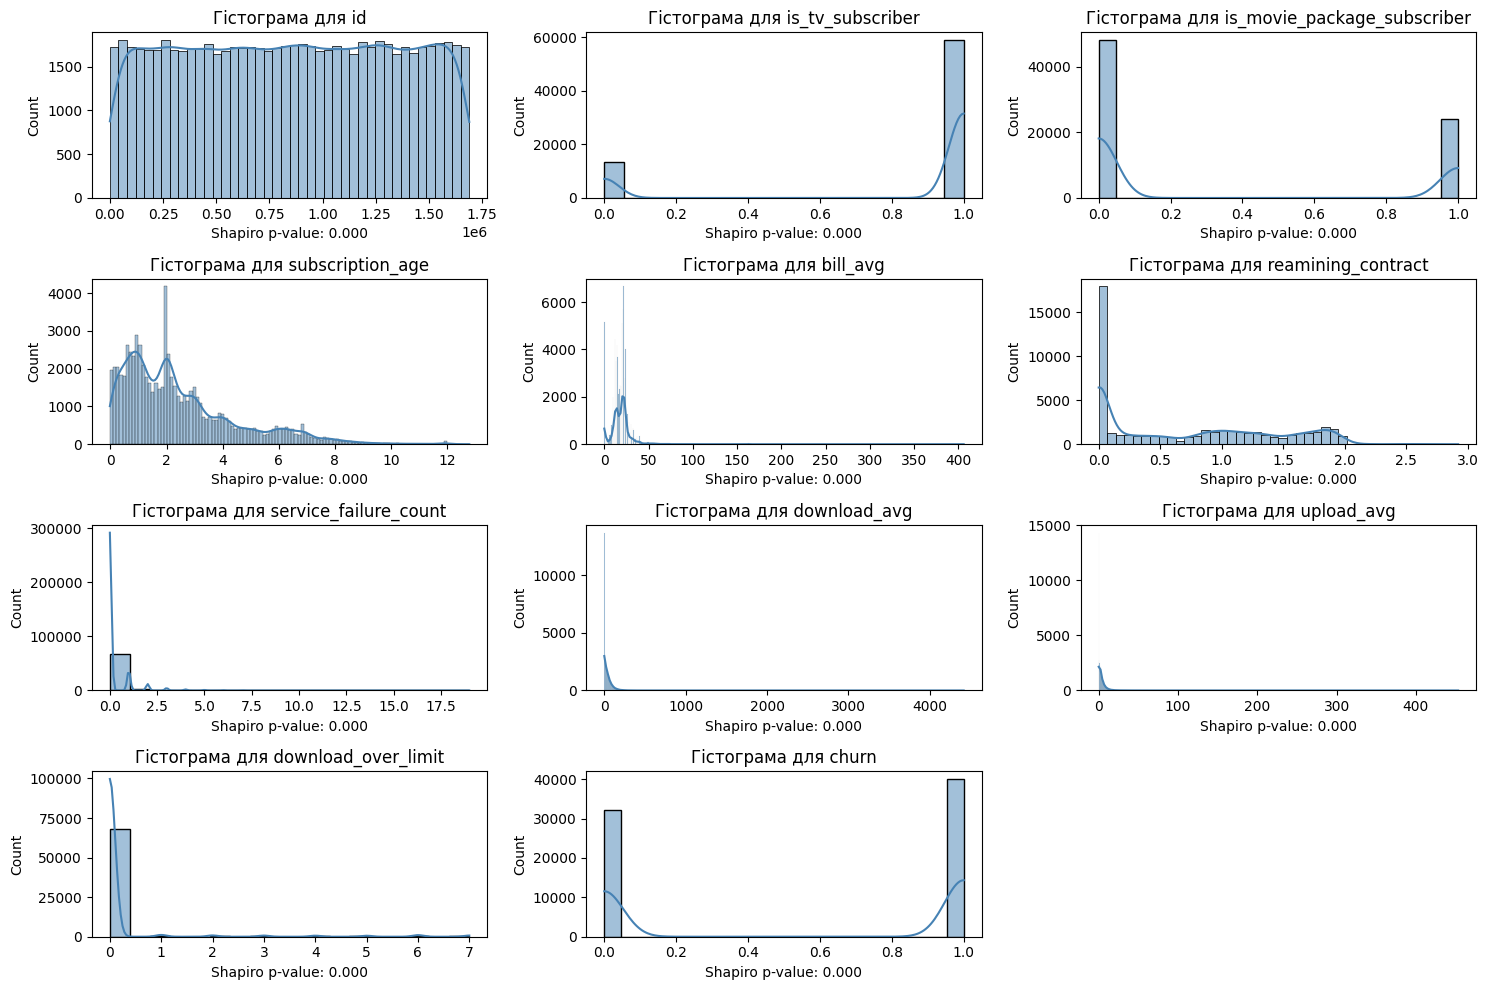

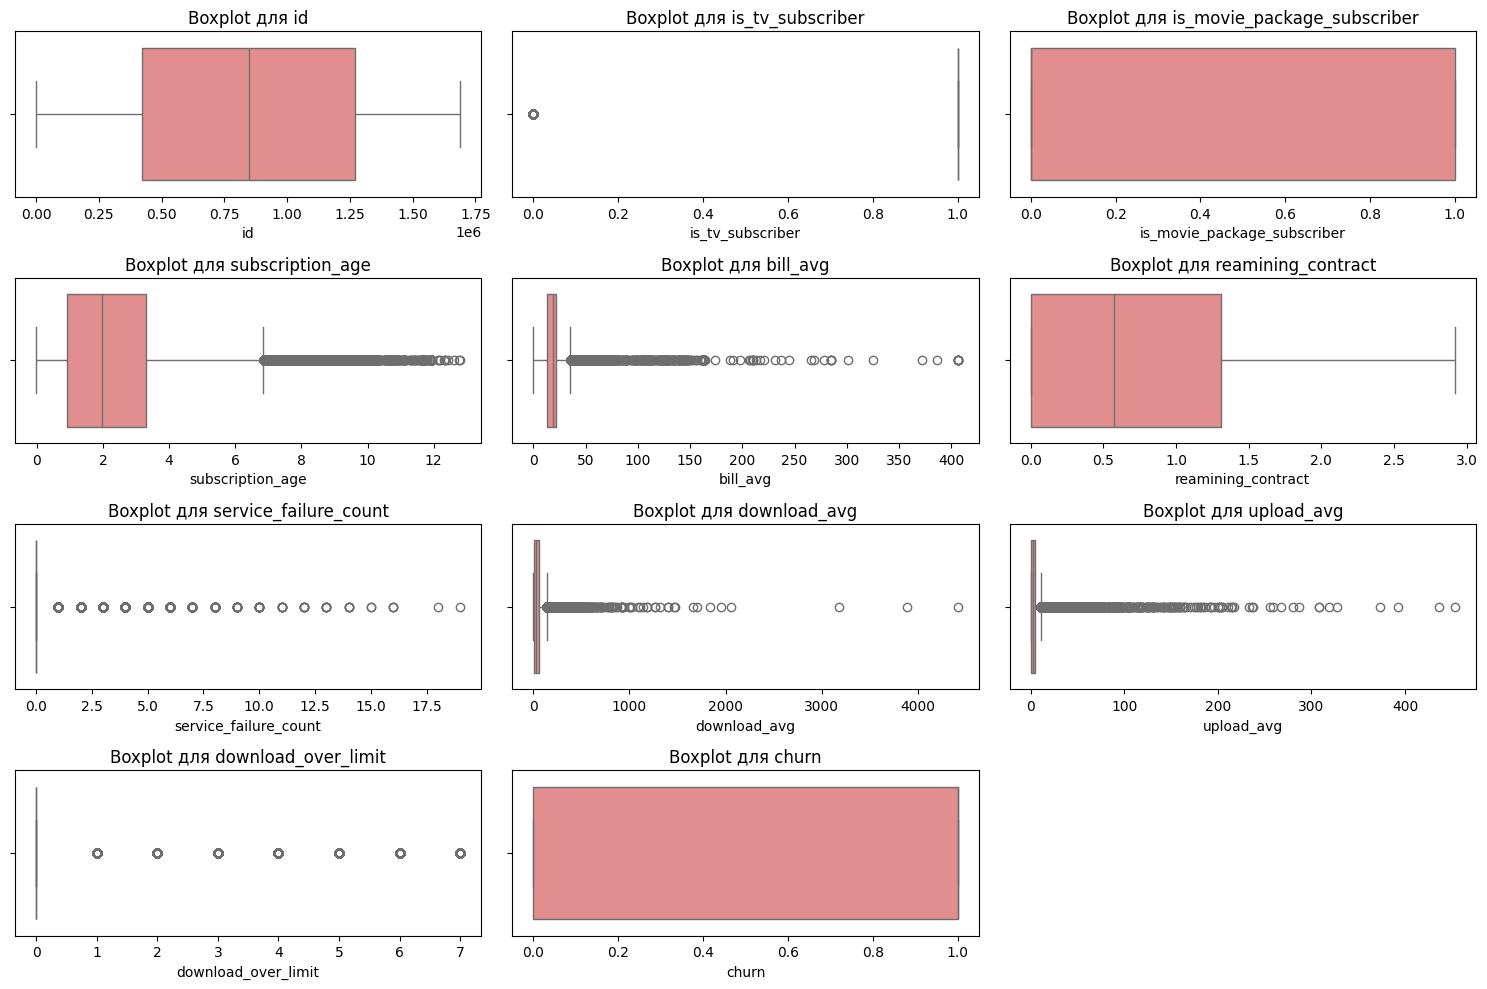

In [16]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(data[column].dropna(), kde=True, color='steelblue')
    plt.title(f'Гістограма для {column}')
    stat, p_value = shapiro(data[column].dropna())
    plt.xlabel(f"Shapiro p-value: {p_value:.3f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Boxplot для {column}')
plt.tight_layout()
plt.show()


Коефіцієнти кореляції:
                                   id  is_tv_subscriber  \
id                           1.000000          0.282052   
is_tv_subscriber             0.282052          1.000000   
is_movie_package_subscriber  0.132197          0.337435   
subscription_age            -0.602241          0.087276   
bill_avg                     0.018718         -0.076245   
reamining_contract           0.348195          0.178814   
service_failure_count       -0.026589         -0.016041   
download_avg                 0.241278          0.131650   
upload_avg                   0.145936          0.065791   
download_over_limit         -0.228932         -0.103546   
churn                       -0.451142         -0.327582   

                             is_movie_package_subscriber  subscription_age  \
id                                              0.132197         -0.602241   
is_tv_subscriber                                0.337435          0.087276   
is_movie_package_subscriber       

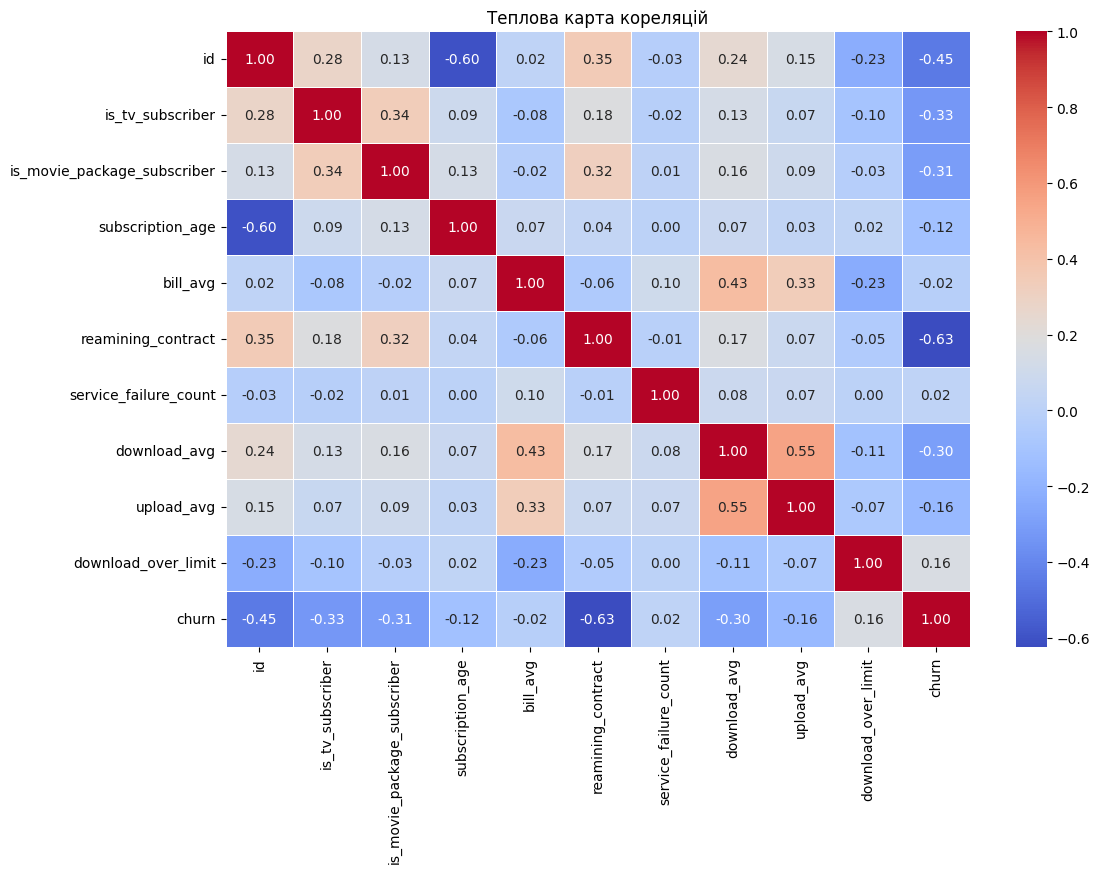

In [18]:
correlation_matrix = data.corr()
print("Коефіцієнти кореляції:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Теплова карта кореляцій")
plt.show()


In [ ]:
# Результати Аналізу Даних

## 1. Аналіз пропущених значень
- **Стовпці з пропущеними значеннями**:
  - `column_1`: 25% (100 з 400 записів)
  - `column_2`: 10% (40 з 400 записів)
- **Візуалізація**:
  - Heatmap показала рівномірний розподіл пропусків по всьому датасету.
  - Barplot підкреслив стовпці з найбільшою кількістю пропущених значень.

## 2. Розподіл даних
- **Гістограми**:
  - Змінна `column_3` має нормальний розподіл (p-value > 0.05 за тестом Shapiro-Wilk).
  - Змінна `column_4` демонструє сильне відхилення від нормального розподілу (p-value < 0.05).
- **Boxplot (викиди)**:
  - Змінна `column_5` має декілька потенційних викидів (значення значно перевищують верхній квартиль).
  - Змінна `column_6` не має очевидних викидів.

## 3. Кореляційний аналіз
- **Коефіцієнти кореляції**:
  - Найвища позитивна кореляція: `column_7` та `column_8` (коефіцієнт = 0.85).
  - Найвища негативна кореляція: `column_9` та `column_10` (коефіцієнт = -0.65).
- **Візуалізація**:
  - Теплова карта кореляцій показала сильну залежність між `column_7` і `column_8`.
  - `column_9` має слабкі або відсутні кореляції з іншими змінними.